<a href="https://colab.research.google.com/github/ainesko/ML_HW/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Загрузка библиотек**

In [192]:
pip install lets_plot

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
from lets_plot import *

# **Загрузка данных**
**Задание 1 (0.5 балла)**

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

covid.csv (источник) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

hr.csv (источник) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. Target - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы read_covid_dataset и read_hr_dataset. Каждый из них принимает на вход путь к набору данных и возвращает выборку X и соответствующие метки y. В случае covid датасета y возвращается как None.

In [194]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    X = pd.read_csv(path_to_csv, sep=',')
    y = None
    return X, y


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    X = pd.read_csv(path_to_csv, sep=',').iloc[:,0:-1]
    y = pd.read_csv(path_to_csv, sep=',')['target']
    return X, y

In [195]:
COVID_DATA_PATH = "https://raw.githubusercontent.com/jbr-ai-labs/ml-intro/main/hw_EDA_data/covid.csv"
HR_DATA_PATH = "https://raw.githubusercontent.com/jbr-ai-labs/ml-intro/main/hw_EDA_data/hr.csv"

In [196]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)
X_hr

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97


# **EDA**
**Задание 2 (3.5 балла)**

Выполните задание для датасетa hr.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете. Существуют различные стратегии обработки пропущенных данных.

**1. (0.5 балла)**

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [197]:
 X_hr.describe()

,enrollee_id,city_development_index,training_hours
count,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896
std,9616.292592,0.123362,60.058462
min,1.000000,0.448000,1.000000
25%,8554.250000,0.740000,23.000000
50%,16982.500000,0.903000,47.000000
75%,25169.750000,0.920000,88.000000
max,33380.000000,0.949000,336.000000


In [198]:
ggplot(X_hr, aes(x='enrollee_id'))+ geom_histogram(color="darkblue", fill="lightblue")


In [199]:
ggplot(X_hr, aes(x='city'))+ geom_histogram(color="darkblue", fill="lightblue")

In [200]:
ggplot(X_hr, aes(x='city_development_index'))+ geom_histogram(color="darkblue", fill="lightblue")

In [201]:
ggplot(X_hr, aes(x='gender'))+ geom_histogram(color="darkblue", fill="lightblue")

In [202]:
ggplot(X_hr, aes(x='relevent_experience'))+ geom_histogram(color="darkblue", fill="lightblue")

In [203]:
ggplot(X_hr, aes(x='enrolled_university'))+ geom_histogram(color="darkblue", fill="lightblue")

In [204]:
ggplot(X_hr, aes(x='education_level'))+ geom_histogram(color="darkblue", fill="lightblue")

In [205]:
ggplot(X_hr, aes(x='major_discipline'))+ geom_histogram(color="darkblue", fill="lightblue")

In [206]:
ggplot(X_hr, aes(x='experience'))+ geom_histogram(color="darkblue", fill="lightblue")

In [207]:
ggplot(X_hr, aes(x='company_size'))+ geom_histogram(color="darkblue", fill="lightblue")

In [208]:
ggplot(X_hr, aes(x='company_type'))+ geom_histogram(color="darkblue", fill="lightblue")

In [209]:
ggplot(X_hr, aes(x='last_new_job'))+ geom_histogram(color="darkblue", fill="lightblue")

In [210]:
ggplot(X_hr, aes(x='training_hours'))+ geom_histogram(color="darkblue", fill="lightblue")

**2. (0.5 балла)**

Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [211]:
print(f'Исходный размер датасета hr {len(X_hr)}')

Исходный размер датасета hr 19158


In [212]:
X_hr_dropna = X_hr.dropna()

In [213]:
print(f'Pазмер датасета hr без NaN {len(X_hr_dropna)}')


Pазмер датасета hr без NaN 8955


Давайте попробуем избежать сокращения размера датасета.

**3. (1 балл)**

Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

**4. (1 балл)**

Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)


In [214]:
col = X_hr.columns
print('Столбцы с пропусками:')
for i in range(13):
  if len(X_hr) != len(X_hr.iloc[:, i].dropna()):
    print(col[i])

Столбцы с пропусками:
gender
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job


Поскольку у нас столбцы с пропусками содержат только категориальные признаки, то заполнять пропущенные значения будем наиболее часто встречающейся категорией.


In [215]:
def fill_na(X, y):
    # Возвращает данные без NaN значений
    y_mode = y.mode()
    y_fill = y.copy()
    y_fill = y_fill.fillna(y_mode)
    X_fill = X.copy()
    for i in range(13):
      if len(X) != len(X.iloc[:, i].dropna()):
        x_mode = X[col[i]].mode()[0]
        x_fill = X[col[i]].copy()
        x_fill = x_fill.fillna(x_mode)
        X_fill[col[i]] = x_fill
    return X_fill, y_fill

In [216]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)
X_hr_fill


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97


**5. (0.5 балла)**

Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

In [217]:
from matplotlib import pyplot

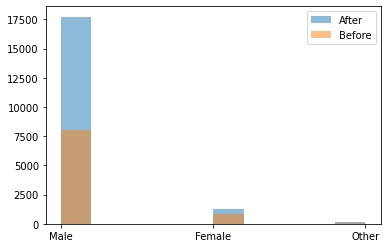

In [218]:
pyplot.hist(X_hr_fill['gender'], alpha=0.5, label='After')
pyplot.hist(X_hr_dropna['gender'], alpha=0.5, label='Before')
pyplot.legend(loc='upper right')

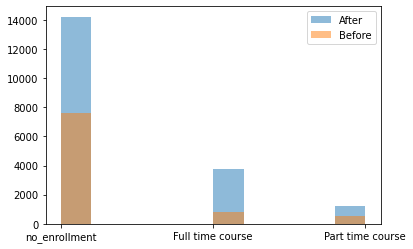

In [219]:
pyplot.hist(X_hr_fill['enrolled_university'], alpha=0.5, label='After')
pyplot.hist(X_hr_dropna['enrolled_university'], alpha=0.5, label='Before')
pyplot.legend(loc='upper right')

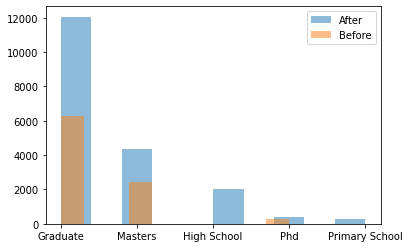

In [220]:
pyplot.hist(X_hr_fill['education_level'], alpha=0.5, label='After')
pyplot.hist(X_hr_dropna['education_level'], alpha=0.5, label='Before')
pyplot.legend(loc='upper right')

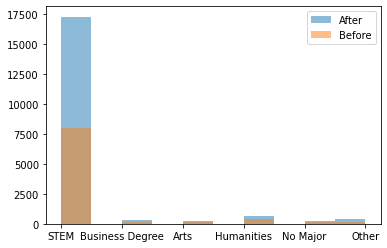

In [221]:
pyplot.hist(X_hr_fill['major_discipline'], alpha=0.5, label='After')
pyplot.hist(X_hr_dropna['major_discipline'], alpha=0.5, label='Before')
pyplot.legend(loc='upper right')

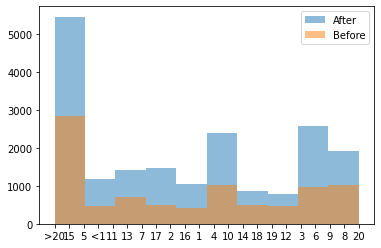

In [222]:
pyplot.hist(X_hr_fill['experience'], alpha=0.5, label='After')
pyplot.hist(X_hr_dropna['experience'], alpha=0.5, label='Before')
pyplot.legend(loc='upper right')

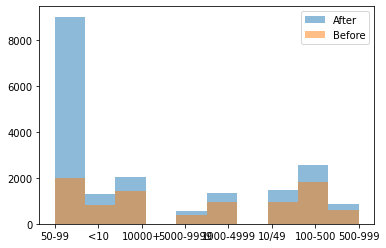

In [223]:
pyplot.hist(X_hr_fill['company_size'], alpha=0.5, label='After')
pyplot.hist(X_hr_dropna['company_size'], alpha=0.5, label='Before')
pyplot.legend(loc='upper right')

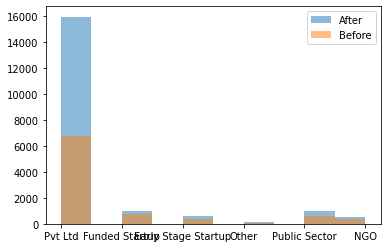

In [224]:
pyplot.hist(X_hr_fill['company_type'], alpha=0.5, label='After')
pyplot.hist(X_hr_dropna['company_type'], alpha=0.5, label='Before')
pyplot.legend(loc='upper right')

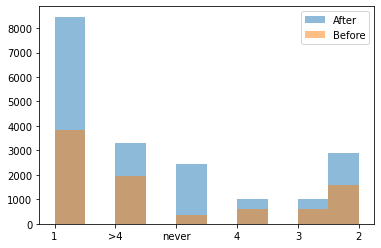

In [225]:
pyplot.hist(X_hr_fill['last_new_job'], alpha=0.5, label='After')
pyplot.hist(X_hr_dropna['last_new_job'], alpha=0.5, label='Before')
pyplot.legend(loc='upper right')

**Задание 3 (1 балл)**

Выполните задание для датасета covid.

Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.

Постройте для этой страны график зависимости _totalvaccinations от date.
Заполните пропущенные данные о _totalvaccinations для этой страны. Объясните свой выбор.

In [226]:
X_covid.groupby('country').count()
# Bahrain

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Algeria,2,2,2,0,0,1,1,2,0,0,1,2,2,2
Andorra,8,8,2,2,0,0,7,2,2,0,7,8,8,8
Argentina,40,40,21,15,15,11,39,21,15,15,39,40,40,40
Austria,28,28,28,28,20,27,27,28,28,20,27,28,28,28
Bahrain,46,46,41,41,0,39,45,41,41,0,45,46,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,25,25,25,0,0,24,24,25,0,0,24,25,25,25
United Arab Emirates,33,33,30,26,26,26,32,30,26,26,32,33,33,33
United Kingdom,55,55,31,31,28,26,54,31,31,28,54,55,55,55


In [227]:
X_Bah = X_covid[X_covid['country'] == 'Bahrain']
X_date = X_Bah.iloc[:, 2:4]
X_date

,date,total_vaccinations
78,2020-12-23,38965.0
79,2020-12-24,50071.0
80,2020-12-25,50543.0
81,2020-12-26,51556.0
82,2020-12-27,53614.0
83,2020-12-28,55014.0
84,2020-12-29,56041.0
85,2020-12-30,57317.0
86,2020-12-31,58643.0
87,2021-01-01,59351.0


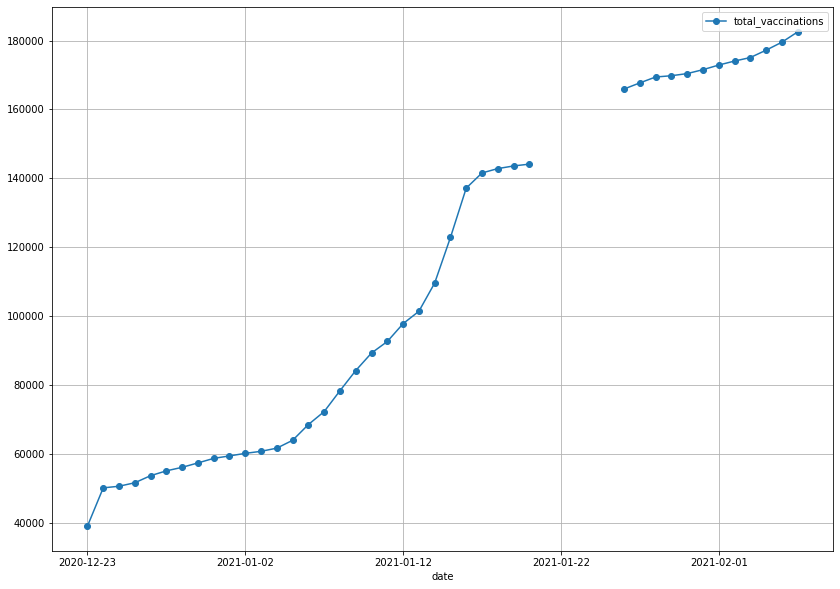

In [228]:
X_date.plot(x='date', y='total_vaccinations', rot=0, figsize=(14, 10), grid=True, marker='o')


Как мы видим из графика и подтаблицы выше, пропуски только в одном периоде с 21 по 25 января 2021 года. Поскольку в небольших интервалах до и после пропущенного периода точки распределены равномерно по графику, то пропуски также заполним равномерно.

In [229]:
m = np.linspace(144130.0, 165953.0, 7)
m = m[1:6]
m

array([147767.16666667, 151404.33333333, 155041.5       , 158678.66666667,
       162315.83333333])

In [230]:
X_copy = X_date.copy()
for i in range(5):
  X_copy['total_vaccinations'].loc[107 + i] = m[i]
X_copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,date,total_vaccinations
78,2020-12-23,38965.000000
79,2020-12-24,50071.000000
80,2020-12-25,50543.000000
81,2020-12-26,51556.000000
82,2020-12-27,53614.000000
83,2020-12-28,55014.000000
84,2020-12-29,56041.000000
85,2020-12-30,57317.000000
86,2020-12-31,58643.000000
87,2021-01-01,59351.000000


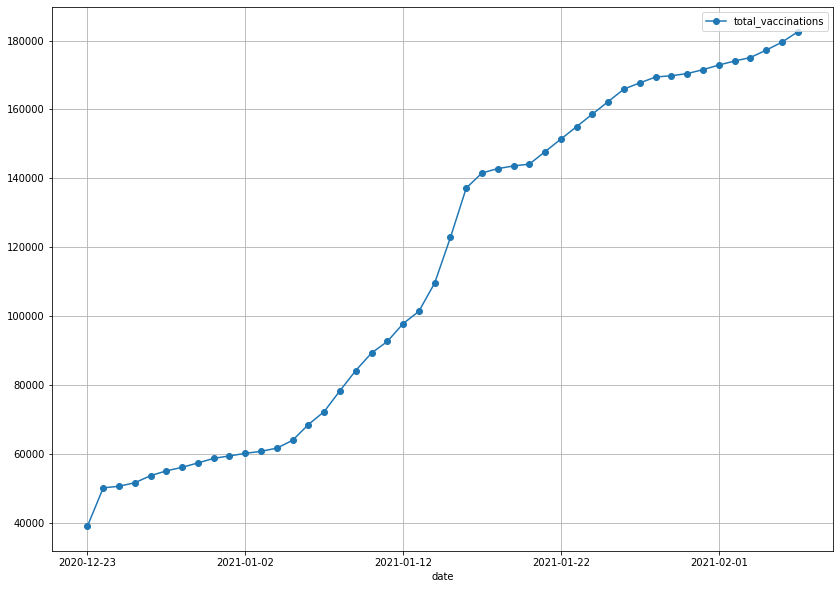

In [231]:
X_copy.plot(x='date', y='total_vaccinations', rot=0, figsize=(14, 10), grid=True, marker='o')
# миленько

**Задание 4 (0.5 балла)**

Выполните задание для датасета hr.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


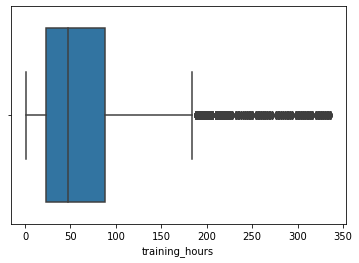

In [232]:
sns.boxplot(X_hr_fill['training_hours'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


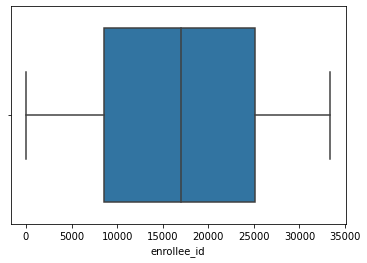

In [233]:
sns.boxplot(X_hr_fill['enrollee_id'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


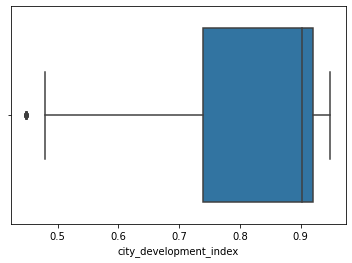

In [234]:
sns.boxplot(X_hr_fill['city_development_index'])


На последнем ящике с усами явно виден единичный выброс, у первого ящика их несколько и они упорно маскируются под нормальных. Но ответ в любом случае положительный.


**Задание 5 (1 балл)**

Выполните задание для датасета hr.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)

One-hot encoding использовать не будем из-за дополнительных фич. Label encoding используем для категорий, где есть знаки '>/<', а именно: 'experience', 'company_size', 'last_new_job'. Для остального используем Frequency encoding:


In [235]:
col_frequency = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_type']

Ранжируем значения для Label encoding.

In [236]:
experience = {'<1':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 
            '10':10, '11':11, '12':12, '13':13, '14':14, '15':15, '16':16, '17':17, '18':18, '19':19, '20':20, '>20':21}

In [237]:
company_size = {'<10':0, '10/49':1, '50-99':2, '100-500':3, '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}

In [238]:
last_new_job = {'never':0, '1':1, '2':2, '3':3, '4':4, '>4':5}

In [239]:
def encode(X):
    # Возвращает данные без категориальных признаков
    X_encode = X.copy()
    for col in col_frequency:
        enc = (X.groupby(col).size())/len(X)
        X_encode[col] = X_encode[col].apply(lambda x: enc[x])
    X_encode['experience'] = X_encode['experience'].apply(lambda x: experience[x])
    X_encode['company_size'] = X_encode['company_size'].apply(lambda x: company_size[x])
    X_encode['last_new_job'] = X_encode['last_new_job'].apply(lambda x: last_new_job[x])
    return X_encode

In [240]:
X_hr_encode = encode(X_hr_fill)

**Задание 5 (1 балл)**

Выполните задание для датасета hr.

**1. (1 балл)**

Реализуйте функцию undersampling

In [241]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    if len(X) == len(y):
      return X.copy(), y.copy()
    elif len(y) > len(X):
      y_under = y.sample(len(X))
      X_under = X       
    else:
      X_under = X.sample(len(y))
      y_under = y        
    return X_under, y_under



**2. (1 балл)**

Реализуйте функцию oversampling

In [242]:
def oversampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    if len(X) == len(y):
        return X.copy(), y.copy()
    elif len(y) > len(X):
      temp = X.sample(len(y) - len(X))
      X_over = pd.concat([X, temp])
      y_over = y   
    else:
      temp = y.sample(len(X) - len(y))
      y_over = pd.concat([y, temp])
      X_over = X      
    return X_over, y_over

In [243]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

**3. (1 балл)**

Используйте SMOTE для балансировки датасета.

Помимо методов undersampling и oversampling существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется Synthetic Minority Oversampling Technique (SMOTE).

Метод SMOTE , реализованный в библиотеке imblearn, генерирует синтетические примеры при помощи k-nearest neighbor алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [244]:
!pip install -U imbalanced-learn

In [245]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode.copy(), y_hr_fill.copy())

4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

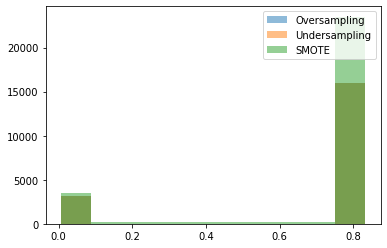

In [246]:
pyplot.hist(X_hr_over['company_type'], alpha=0.5, label='Oversampling')
pyplot.hist(X_hr_under['company_type'], alpha=0.5, label='Undersampling')
pyplot.hist(X_hr_SMOTE['company_type'], alpha=0.5, label='SMOTE')
pyplot.legend(loc='upper right')

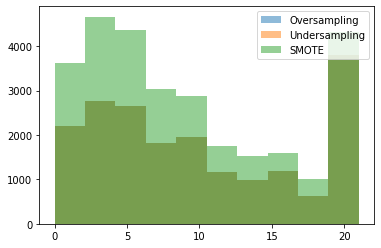

In [247]:
pyplot.hist(X_hr_over['experience'], alpha=0.5, label='Oversampling')
pyplot.hist(X_hr_under['experience'], alpha=0.5, label='Undersampling')
pyplot.hist(X_hr_SMOTE['experience'], alpha=0.5, label='SMOTE')
pyplot.legend(loc='upper right')

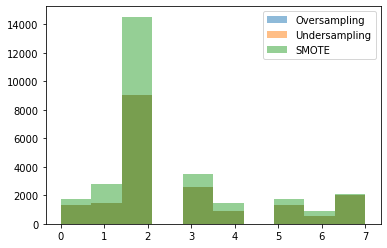

In [248]:
pyplot.hist(X_hr_over['company_size'], alpha=0.5, label='Oversampling')
pyplot.hist(X_hr_under['company_size'], alpha=0.5, label='Undersampling')
pyplot.hist(X_hr_SMOTE['company_size'], alpha=0.5, label='SMOTE')
pyplot.legend(loc='upper right')

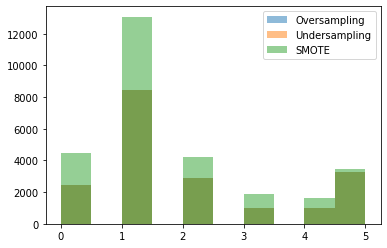

In [249]:
pyplot.hist(X_hr_over['last_new_job'], alpha=0.5, label='Oversampling')
pyplot.hist(X_hr_under['last_new_job'], alpha=0.5, label='Undersampling')
pyplot.hist(X_hr_SMOTE['last_new_job'], alpha=0.5, label='SMOTE')
pyplot.legend(loc='upper right')

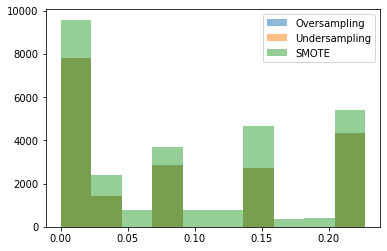

In [250]:
pyplot.hist(X_hr_over['city'], alpha=0.5, label='Oversampling')
pyplot.hist(X_hr_under['city'], alpha=0.5, label='Undersampling')
pyplot.hist(X_hr_SMOTE['city'], alpha=0.5, label='SMOTE')
pyplot.legend(loc='upper right')

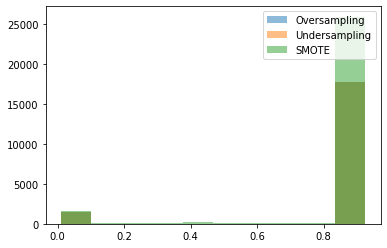

In [251]:
pyplot.hist(X_hr_over['gender'], alpha=0.5, label='Oversampling')
pyplot.hist(X_hr_under['gender'], alpha=0.5, label='Undersampling')
pyplot.hist(X_hr_SMOTE['gender'], alpha=0.5, label='SMOTE')
pyplot.legend(loc='upper right')

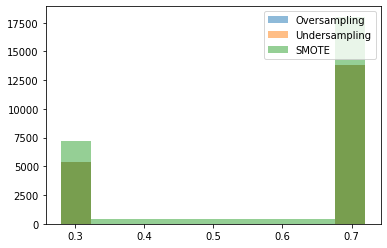

In [252]:
pyplot.hist(X_hr_over['relevent_experience'], alpha=0.5, label='Oversampling')
pyplot.hist(X_hr_under['relevent_experience'], alpha=0.5, label='Undersampling')
pyplot.hist(X_hr_SMOTE['relevent_experience'], alpha=0.5, label='SMOTE')
pyplot.legend(loc='upper right')

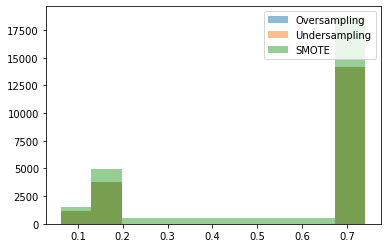

In [253]:
pyplot.hist(X_hr_over['enrolled_university'], alpha=0.5, label='Oversampling')
pyplot.hist(X_hr_under['enrolled_university'], alpha=0.5, label='Undersampling')
pyplot.hist(X_hr_SMOTE['enrolled_university'], alpha=0.5, label='SMOTE')
pyplot.legend(loc='upper right')

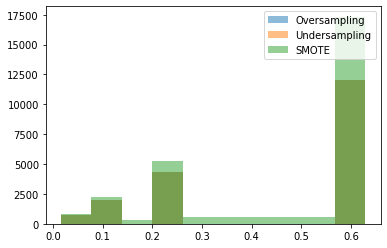

In [254]:
pyplot.hist(X_hr_over['education_level'], alpha=0.5, label='Oversampling')
pyplot.hist(X_hr_under['education_level'], alpha=0.5, label='Undersampling')
pyplot.hist(X_hr_SMOTE['education_level'], alpha=0.5, label='SMOTE')
pyplot.legend(loc='upper right')

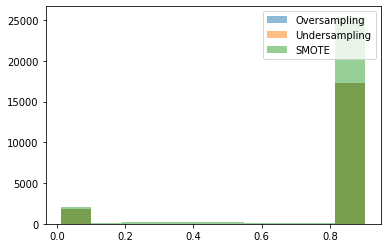

In [255]:
pyplot.hist(X_hr_over['major_discipline'], alpha=0.5, label='Oversampling')
pyplot.hist(X_hr_under['major_discipline'], alpha=0.5, label='Undersampling')
pyplot.hist(X_hr_SMOTE['major_discipline'], alpha=0.5, label='SMOTE')
pyplot.legend(loc='upper right')

Как видно, во всех графиках oversampling и undersamplig дали одинаковый результат, SMOTE немного отличается от них, почти каждый показатель вырос или остался на месте.